<a href="https://colab.research.google.com/github/mumbua-mutinda/Carbon-emissions-predictor-/blob/main/Emmissions_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing of essential packages
!pip install pandas scikit-learn matplotlib seaborn --quiet

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
from google.colab import files
uploaded = files.upload()

# Loading the uploaded dataset
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving co2_emission.csv to co2_emission.csv


,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


Data Exploration

In [ ]:
# Basic information about the dataset
df.info()

# Displaying the first few rows
df.head()

# Checking for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


,0
Entity,0
Code,2207
Year,0
Annual CO₂ emissions (tonnes ),0


Data Cleaning

In [ ]:
# Drop the 'Code' column since it's mostly missing and not useful
df.drop(columns=['Code'], inplace=True)

# Checking for duplicates
df.drop_duplicates(inplace=True)

# Renaming the emissions column for easier access
df.rename(columns={'Annual CO₂ emissions (tonnes )': 'CO2_Emissions'}, inplace=True)

# Preview of the cleaned data
df.head()


,Entity,Year,CO2_Emissions
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0


Features for the Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to work on
data = df.copy()

# Encodes 'Entity' to numeric labels
le = LabelEncoder()
data['Entity_encoded'] = le.fit_transform(data['Entity'])

# Define features and target
X = data[['Year', 'Entity_encoded']]
y = data['CO2_Emissions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display of sample
data.head()


,Entity,Year,CO2_Emissions,Entity_encoded
0,Afghanistan,1949,14656.0,0
1,Afghanistan,1950,84272.0,0
2,Afghanistan,1951,91600.0,0
3,Afghanistan,1952,91600.0,0
4,Afghanistan,1953,106256.0,0


Training the machine learning model

In [ ]:
# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


Evaluating the Model

In [ ]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 6631237.99
R² Score: 1.00


Visualization of Predictions vs Actual

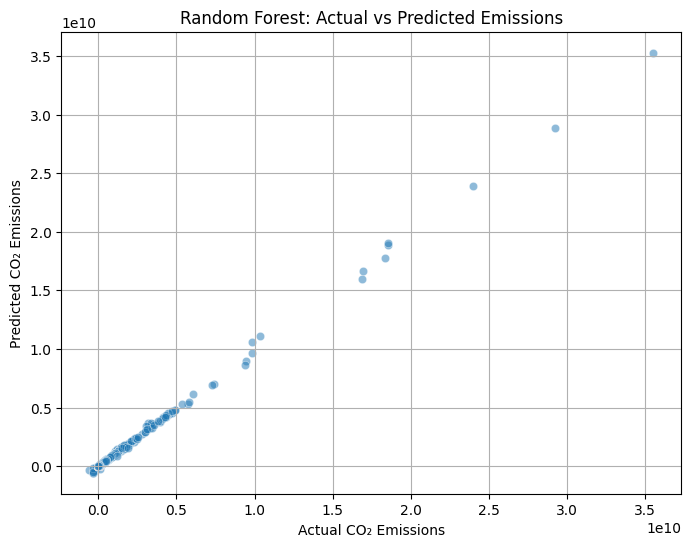

In [ ]:
# Visual comparison
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual CO₂ Emissions')
plt.ylabel('Predicted CO₂ Emissions')
plt.title('Random Forest: Actual vs Predicted Emissions')
plt.grid(True)
plt.show()


Kenya's emmission trend

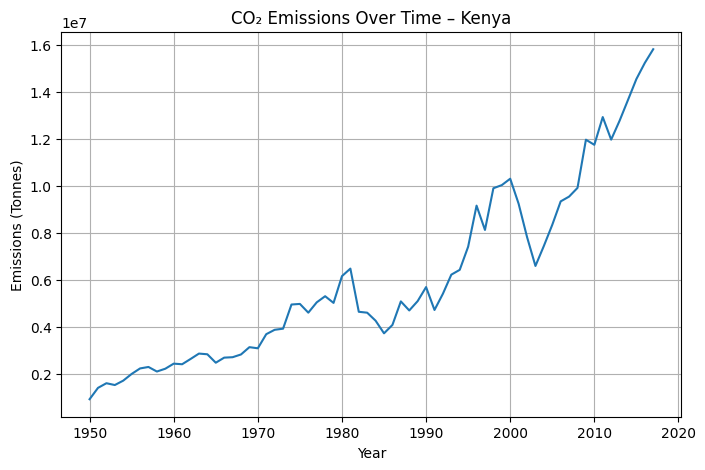

In [ ]:
# Trend for Kenya
kenya = df[df['Entity'] == 'Kenya']
plt.figure(figsize=(8, 5))
sns.lineplot(data=kenya, x='Year', y='CO2_Emissions')
plt.title('CO₂ Emissions Over Time – Kenya')
plt.ylabel('Emissions (Tonnes)')
plt.grid(True)
plt.show()


Feature Importance to show model behaviour

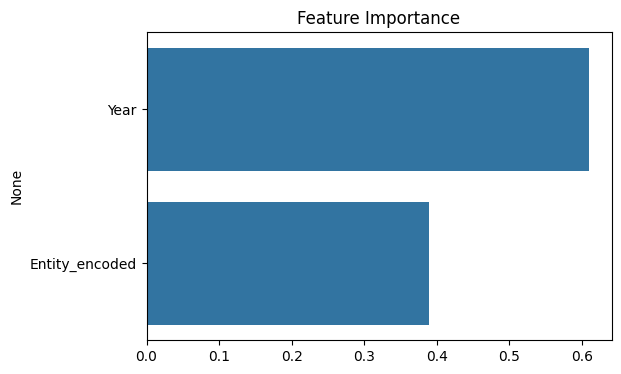

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()
